# 多层感知机

In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_set = datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=ToTensor())
testing_set = datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=ToTensor())
print(f'training dataset size: {len(training_set)}')
print(f'testing dataset size: {len(testing_set)}')
print(f'image size: {training_set[0][0].shape}')

training dataset size: 60000
testing dataset size: 10000
image size: torch.Size([1, 28, 28])


In [4]:
batch_size = 256
training_iter = torch.utils.data.DataLoader(
    training_set, batch_size, shuffle=True)
testing_iter = torch.utils.data.DataLoader(testing_set, batch_size)

In [6]:
def accuracy(y_hat, y):
    max_indices = torch.max(y_hat, dim=1)[1]
    return (y == max_indices).to(dtype=torch.float32).mean()


def accuracy_on(model, data_iter):
    acc = []
    for X, y in data_iter:
        y_hat = model(X)
        acc.append(accuracy(y_hat, y))
    return torch.tensor(acc).mean().item()

the loss of epoch 0: 1.8205, accuracy on training set: 0.3001, accuracy on testing set: 0.5652
the loss of epoch 1: 0.9457, accuracy on training set: 0.6398, accuracy on testing set: 0.6561
the loss of epoch 2: 0.7012, accuracy on training set: 0.7419, accuracy on testing set: 0.7698
the loss of epoch 3: 0.5993, accuracy on training set: 0.7828, accuracy on testing set: 0.7765
the loss of epoch 4: 0.5382, accuracy on training set: 0.8086, accuracy on testing set: 0.8055
the loss of epoch 5: 0.4949, accuracy on training set: 0.8228, accuracy on testing set: 0.8215
the loss of epoch 6: 0.4612, accuracy on training set: 0.8343, accuracy on testing set: 0.8223
the loss of epoch 7: 0.4384, accuracy on training set: 0.8427, accuracy on testing set: 0.8211
the loss of epoch 8: 0.4202, accuracy on training set: 0.8494, accuracy on testing set: 0.8341
the loss of epoch 9: 0.4028, accuracy on training set: 0.8535, accuracy on testing set: 0.8345
the loss of epoch 10: 0.3873, accuracy on training

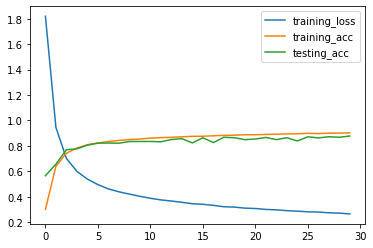

In [10]:
num_features = 784
num_classes = 10
num_hidden1 = 256
num_hidden2 = 128
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(num_features, num_hidden1), 
                      nn.ReLU(), 
                      nn.Linear(num_hidden1, num_hidden2), 
                      nn.ReLU(),
                      nn.Linear(num_hidden2, num_classes))

def init_weigth(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

model.apply(init_weigth)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epoch = 30
training_loss = []
training_acc = []
testing_acc = []
for i in range(epoch):
    epoch_loss = 0
    epoch_acc = 0
    for X, y in training_iter:
        y_hat = model(X)
        l = loss(y_hat, y)
        epoch_loss += l.item()
        epoch_acc += accuracy(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    training_loss.append(epoch_loss / len(training_iter))
    training_acc.append(epoch_acc / len(training_iter))
    testing_acc.append(accuracy_on(model, testing_iter))
    print(
        f'the loss of epoch {i}: {training_loss[-1]:.4f}, accuracy on training set: {training_acc[-1]:.4f}, accuracy on testing set: {testing_acc[-1]:.4f}')
plt.plot(training_loss, label='training_loss')
plt.plot(training_acc, label='training_acc')
plt.plot(testing_acc, label='testing_acc')
plt.legend()
plt.show()